##                  Time Series Modeling with ARIMA and SARIMA models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [4]:
dataset = pd.read_csv('datasets_62956_121905_AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format= True)

In [136]:
indexMonthdf = dataset.set_index(['Month'])

In [137]:
indexMonthdf

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


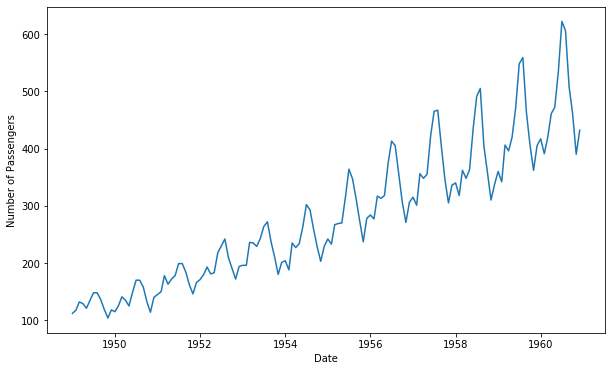

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(indexMonthdf)

#### Checking the rolling statistics to understand the stationarity

In [8]:
#rolling statistics
rolmean = indexMonthdf.rolling(window=12).mean()

rolstd = indexMonthdf.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


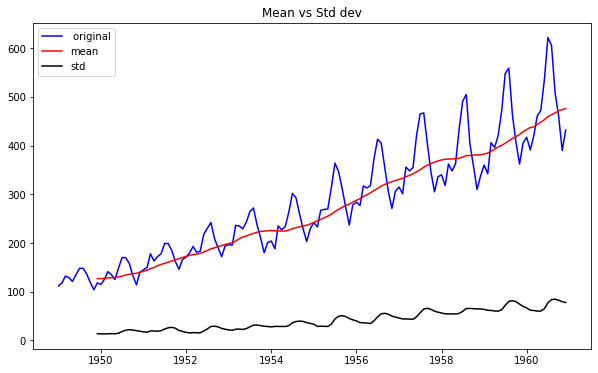

In [9]:
#plot rolling statistics
orig =plt.plot(indexMonthdf,color = "blue", label = " original")
mean = plt.plot(rolmean,color = "red", label = "mean")
std = plt.plot(rolstd,color = "black",label = "std")
plt.legend(loc = "best")
plt.title("Mean vs Std dev")
plt.show(block=False)


In [149]:
#Converting the data to log scale
indexMonthdf_logscale = np.log(indexMonthdf)
indexMonthdf_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [156]:
#Writing a function to calculate rolling statistics and perform Augmented dickey fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Calculating Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig =plt.plot(timeseries,color = "blue", label = " original")
    mean = plt.plot(movingAverage,color = "red", label = "mean")
    std = plt.plot(movingSTD,color = "black",label = "std")
    plt.legend(loc = "best")
    plt.title("Mean vs Std dev")
    plt.show(block=False)
             
    #perform dickey fuller test
    print("Results of dickey fuller test")
    result = adfuller(timeseries['#Passengers'],autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','Critical Values']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    #dfoutput = pd.Series(dftest[0:4])
    #print(dfoutput)

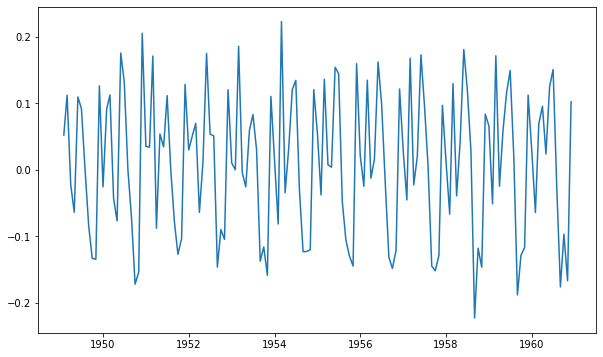

In [160]:
datasetLogDiffShifting = indexMonthdf_logscale - indexMonthdf_logscale.shift(1)
plt.plot(datasetLogDiffShifting)

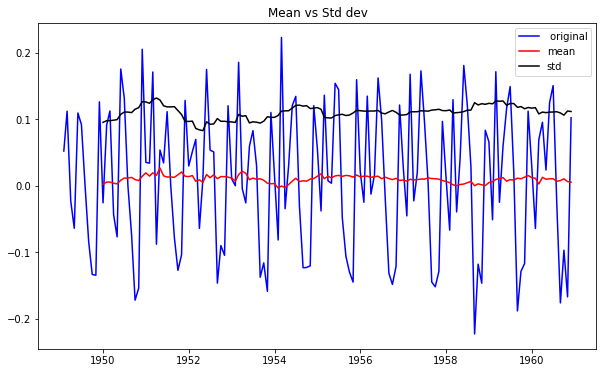

Results of dickey fuller test
ADF Test Statistic : -2.717130598388118
p-value : 0.07112054815086118
#Lags Used : 14
Number of Observations Used : 128
Critical Values : {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


In [161]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

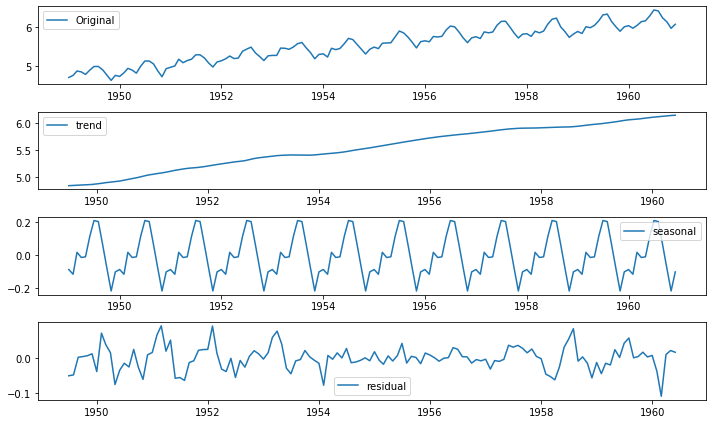

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition  = seasonal_decompose(indexMonthdf_logscale)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexMonthdf_logscale,label = "Original")
plt.legend(loc ="best")

plt.subplot(412)
plt.plot(trend,label ="trend")
plt.legend(loc  ="best")


plt.subplot(413)
plt.plot(seasonal,label ="seasonal")
plt.legend(loc  ="best")

plt.subplot(414)
plt.plot(residual,label ="residual")
plt.legend(loc  ="best")

plt.tight_layout()

In [163]:
datasetLogDiffShifting

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


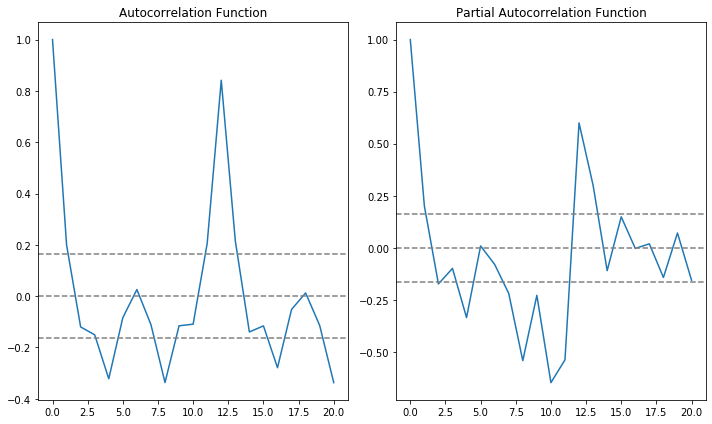

In [164]:
#plotting ACF and PACF graphs to find the value of p,q
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols' )

#plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.title("Autocorrelation Function")

#plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

###### p and q values are determined at the x axis points where graph is touching zero for the first time

In [165]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot

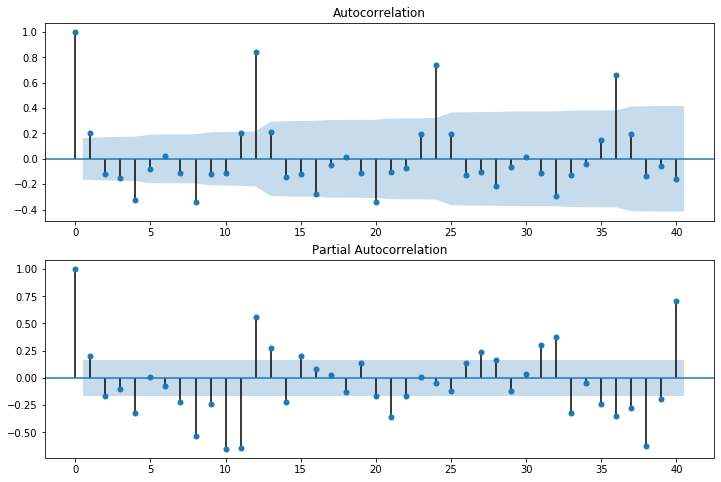

In [166]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(datasetLogDiffShifting,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(datasetLogDiffShifting,lags=40,ax=ax2)

C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


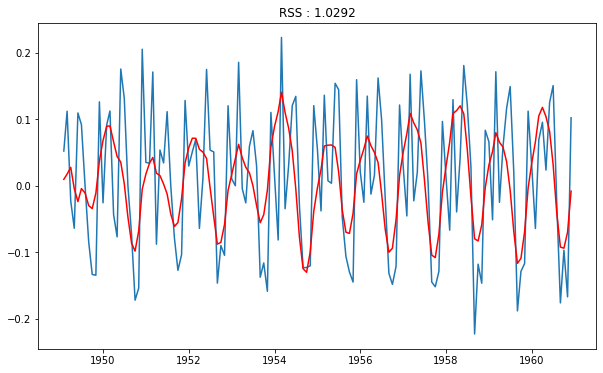

In [167]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexMonthdf_logscale,order =(2,1,2))
results_AR = model.fit(disp =1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR Model')

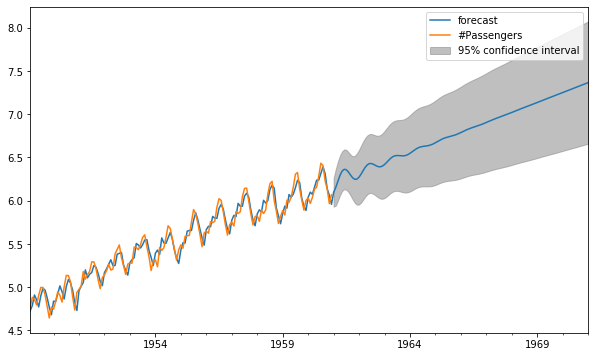

In [183]:
results_AR.plot_predict(1,264)
x = results_AR.forecast(steps = 120)

###### 120 steps of forecast will be outputting 3 arrays of 120 elements each (Prediction,deviation,range)

In [185]:
x[0]

array([6.09553392, 6.15281402, 6.22442963, 6.29241097, 6.3416471 ,
       6.36359354, 6.35784678, 6.33139297, 6.29597534, 6.26447708,
       6.2473832 , 6.25025166, 6.27275829, 6.30940304, 6.35151484,
       6.38988645, 6.4172737 , 6.43011043, 6.42906678, 6.41842478,
       6.40456144, 6.39403604, 6.39183071, 6.40019491, 6.41833679,
       6.44295394, 6.46937421, 6.49293972, 6.51024104, 6.51989018,
       6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
       6.53322343, 6.54812852, 6.5659154 , 6.58410291, 6.60036521,
       6.61313247, 6.62192762, 6.62737769, 6.63093108, 6.63438668,
       6.63937964, 6.64696483, 6.65739819, 6.67015303, 6.68414229,
       6.69806604, 6.71077878, 6.72157709, 6.7303396 , 6.73749786,
       6.74386354, 6.75037298, 6.75782567, 6.76668656, 6.77699797,
       6.78841293, 6.80032827, 6.81207168, 6.82308733, 6.83307108,
       6.84202464, 6.85022283, 6.85811192, 6.8661731 , 6.87479121,
       6.88416272, 6.89426353, 6.90487859, 6.91567907, 6.92632

In [186]:
dfARIMA = pd.DataFrame(results_AR.forecast(steps = 120)[0], columns = ['forecast'])

In [189]:
dfARIMA['forecast'] = np.exp(dfARIMA['forecast'])

In [193]:
dfARIMA = indexMonthdf

In [223]:
#creating a dataframe with index values as next 5 years
from pandas.tseries.offsets import DateOffset
future_dates=[indexMonthdf.index[-1]+ DateOffset(months=x)for x in range(0,61)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=indexMonthdf.columns)

In [224]:
new_df = pd.DataFrame(results_AR.forecast(steps = 60)[0], columns = ['forecast']) 

In [225]:
new_df.index = future_dates_df.index

In [226]:
new_df

,forecast
1961-01-01,6.095534
1961-02-01,6.152814
1961-03-01,6.224430
1961-04-01,6.292411
1961-05-01,6.341647
1961-06-01,6.363594
1961-07-01,6.357847
1961-08-01,6.331393
1961-09-01,6.295975
1961-10-01,6.264477


In [227]:
future_dates_df =pd.concat([future_daest_df,new_df],axis=1)

In [228]:
future_dates_df['forecast'] = np.exp(future_dates_df['forecast'])

In [229]:
finalARIMA = pd.concat([indexMonthdf,future_dates_df])

In [237]:
model=sm.tsa.statespace.SARIMAX(indexMonthdf_logscale['#Passengers'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


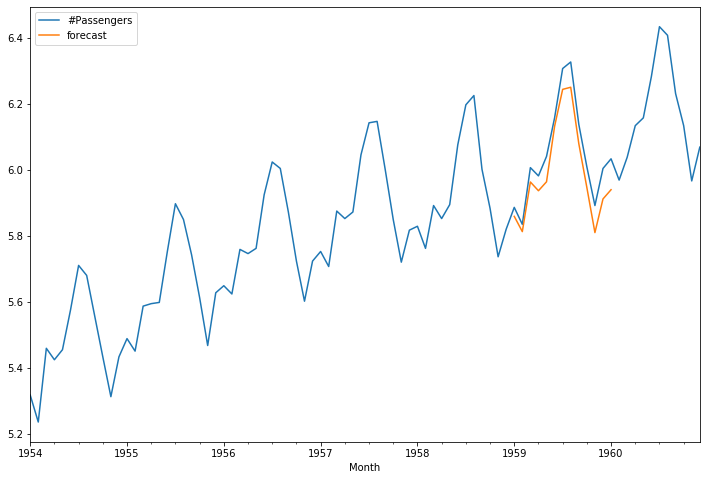

In [238]:
indexMonthdf_logscale['forecast']=results.predict(start=120,end=132,dynamic=True)
indexMonthdf_logscale[['#Passengers','forecast']].iloc[60:].plot(figsize=(12,8))

In [245]:
#creating a dataframe with index values as next 5 years
from pandas.tseries.offsets import DateOffset
future_dates=[indexMonthdf.index[-1]+ DateOffset(months=x)for x in range(0,61)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=indexMonthdf.columns)

In [243]:
new_df = pd.DataFrame(results.predict(start=145,end=205,dynamic=True),columns=['forecast'])

C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [244]:
new_df

,forecast
1961-02-01,6.055407
1961-03-01,6.177453
1961-04-01,6.201709
1961-05-01,6.236691
1961-06-01,6.372725
...,...
1965-10-01,6.606682
1965-11-01,6.461318
1965-12-01,6.565707
1966-01-01,6.603608


In [246]:
future_dates_df = pd.concat([future_dates_df,new_df],axis=1)

In [249]:
future_dates_df['forecast'] = np.exp(future_dates_df['forecast'])

In [250]:
finalSARIMA = pd.concat([indexMonthdf,future_dates_df])

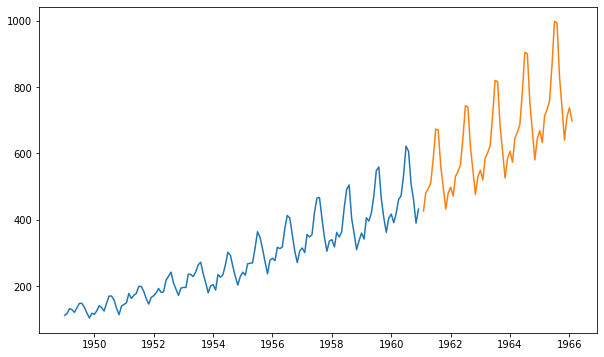

In [251]:
plt.plot(finalSARIMA)